In [2]:
import cv2 as cv2
from matplotlib import pyplot as plt
import scipy.signal as sg 
import scipy.ndimage as sc
from scipy.stats import multivariate_normal
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['image.cmap'] = 'gray'
from imageutils.image_utils import open_image, add_noise
# All functions created in the previous notebooks will be consecutively added to our image_utils package
# to be used in the future

## In this chapter we are going to explore kernel based filtering: 

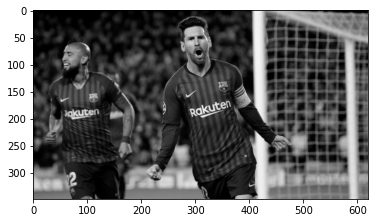

In [3]:
path = "../images/messi.jpg"
image_new = open_image(path, type="gray")
plt.imshow(image_new)

In [4]:
image_new.shape[:2]

(349, 620)

### For starters we are going to use just a matrix of ones to represent a uniform filter. We will explore more complicated ones later:

In [5]:
test_kernel = 1*np.ones((3,3), dtype=np.uint8)
print(test_kernel)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


In [6]:
def zero_padding(image, pad):
    pad_image = np.zeros((image.shape[0]+2*pad, image.shape[1]+ 2*pad))
    pad_image[pad: -pad, pad: -pad] = image
    return pad_image

## We start of by adding gaussian noise to our image like we did previously 

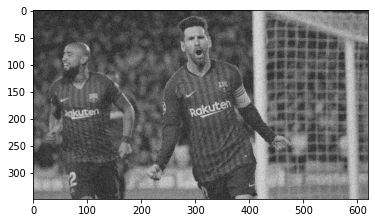

In [7]:
noisy = add_noise(0, 20, image_new)
plt.imshow(noisy)

In [8]:
def check_kernel(kernel):
    k_size = kernel.shape[0]
    k_mid = np.floor(k_size/2)
    if (k_size!=kernel.shape[1]):
        print("please enter a square matrix with an odd number size")
        return False
    else:
        if(k_size%2==0):
            print("please enter a square matrix with odd size")
            return False 
    return True

In [9]:
def convolve_kernel(image, kernel):

    #some key variables to consider:
    k_size = kernel.shape[0]-1
    k_mid = int(np.floor(k_size/2)) # index of the middle pixel. floor because numpy indexing starts at 0.
    k_span = int(k_size - k_mid) # span is the number of pixels the kernel "spans" from the center pixel
    print("k_span is ", k_span)
    img_height, img_width = image.shape
    
    
    #padding the image with zeros so we can perform convolution on border pixels
    image = zero_padding(image, k_span)
    print("image height is:", img_height, "& image with is:", img_width)
    kernel_sum = np.sum(np.concatenate(kernel))
    result = np.zeros_like(image)
    
    #perform the actual convolution
    for i in range(k_span, img_width + k_span):
        for j in range( k_span, img_height + k_span):
            #roi is the region of interest
            roi =image[j-k_span:j+ k_span+1,i-k_span:i+k_span+1]
#             roi =image[k_span:-k_span,k_span:-k_span]
            #kernel multiplication along with normalization:
            result[j,i] = np.sum(np.concatenate(roi * kernel/kernel_sum))
    
    
    return result[k_span: -k_span, k_span: - k_span]

k_span is  1
image height is: 349 & image with is: 620
(349, 620)


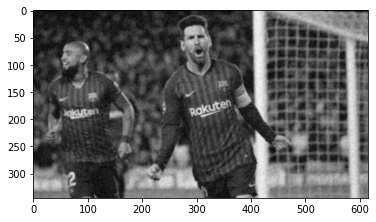

In [10]:
filtered = convolve_kernel(noisy, test_kernel)
plt.imshow(filtered[2:-2, 2:-2])
print(filtered.shape)

## Let's compare the three images: 

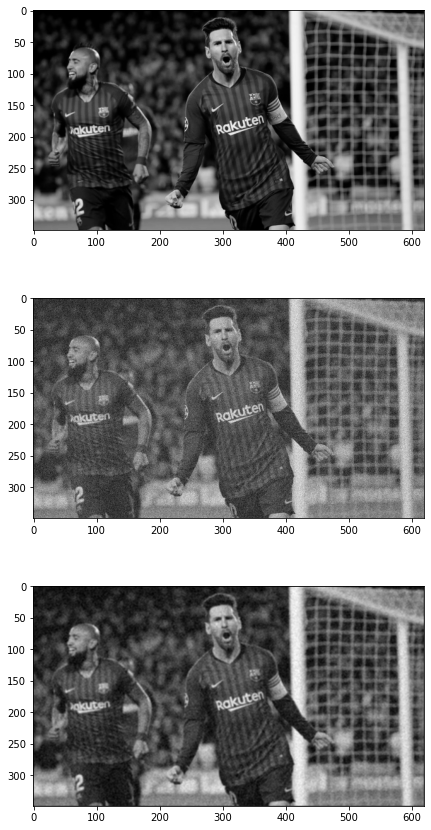

In [11]:
plt.figure(figsize=(7,15))
plt.subplot(311)
plt.imshow(image_new)
plt.subplot(312)
plt.imshow(noisy)
plt.subplot(313)
plt.imshow(filtered)

### Insight:

- In the previous example where we perform a moving average over a pixel a key assumption we had was that each pixel around our target pixel mattered equally including the target pixel. which is why each one of them was given the same "importance" or weight. 
- However that is not always the case, when we consider non uniform weights in our filters, the idea behimd is that, as me move further away from our target pixel, the value of the further pixels would matter less and less to us.

In [12]:
gaussian_kernel = test_kernel
gaussian_kernel[1,1] = 4 
gaussian_kernel[1,0] = gaussian_kernel[0,1] = gaussian_kernel[1, 2] = gaussian_kernel[2,1] = 2
print(gaussian_kernel)

[[1 2 1]
 [2 4 2]
 [1 2 1]]


k_span is  1
image height is: 349 & image with is: 620


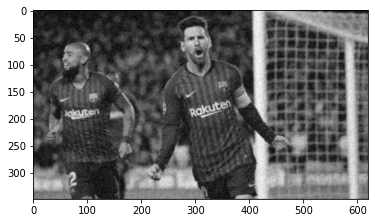

In [13]:
gaussian_filtered = convolve_kernel(noisy, gaussian_kernel)
plt.imshow(gaussian_filtered)

## Comparing the two:

Text(0.5, 1.0, 'noisy image')

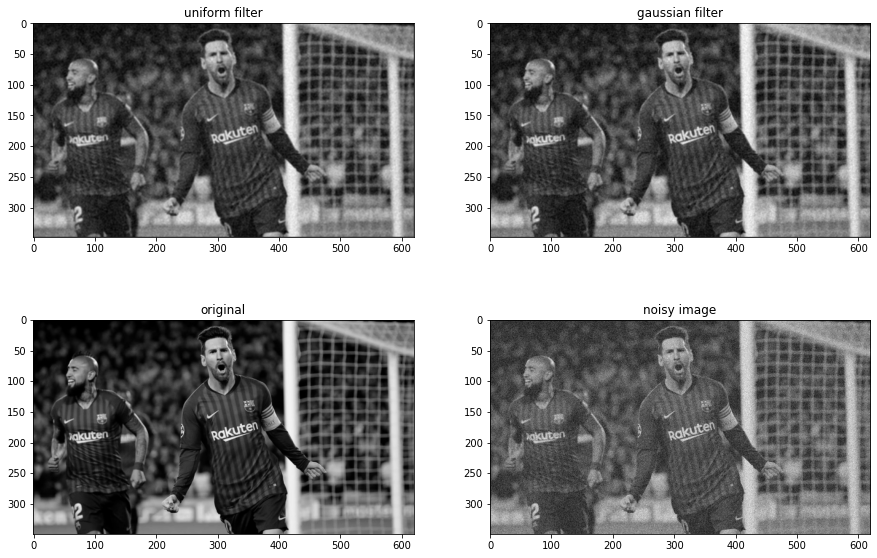

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(filtered)
plt.title("uniform filter")
plt.subplot(222)
plt.imshow(gaussian_filtered)
plt.title("gaussian filter")
plt.subplot(223)
plt.imshow(image_new)
plt.title("original")
plt.subplot(224)
plt.imshow(noisy)
plt.title("noisy image")